In [5]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 969.1 kB/s eta 0:00:001m971.8 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-macosx_12_0_arm64.whl size=1125168 sha256=0556a3c1278d6e647f20146a6852298d758af2d05fbe0615a0001d4c733cd146
  Stored in directory: /Users/noteorbit/Library/Caches/pip/wheels/df/e4/a6/7ad72453dd693f420b0c639bedeec34641738d11b55d8d9b84
Successfully built scikit-surprise

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.2 MB/s eta 0:00:00 MB/s eta 0:00:01:010m
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


# IMPORT 

In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import accuracy, Dataset, SVD,Reader , NormalPredictor, KNNBasic , NMF
from surprise.model_selection import train_test_split, cross_validate , GridSearchCV , KFold


In [531]:
data = pd.read_csv('data/real.csv',index_col=0)
data_as = pd.read_csv('data/Form.csv')

# EDA

In [532]:
data.head()

,Store,User,Rating,Review,Duration
0,NAP's Coffee & Roasters,Nuunet D.,5,ร้านนี้ยกให้เป็นที่หนึ่งในอุบลเลย กาแฟดีมากๆ ร...,เดือนที่แล้ว
1,NAP's Coffee & Roasters,vanai sun,3,เป็นอีกหนึ่งร้านที่ตั้งใจจะไป วันนี้ได้มาลองชิ...,10 เดือนที่แล้ว
2,NAP's Coffee & Roasters,Phonanan Seeon,5,10 10 10 บรรยากาศคือดี ใดๆคือพนักงานดีมาก เคร...,9 เดือนที่แล้ว
3,NAP's Coffee & Roasters,Chavakorn Laophetsakunchai,5,ดีเลยยยย กาแฟ หอมอร่อยยย เมล็ดก้ดีๆๆ,เดือนที่แล้ว
4,NAP's Coffee & Roasters,community man,5,กาแฟรสชาดดีมาก แต่วันนี้มีน้องๆคุยกันเสียงดังม...,ปีที่แล้ว


In [533]:
data_as.head()

,Timestamp,Age,Gender,Store,menu,Rating,amenities
0,1/3/2023 16:52:51,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1,1/3/2023 16:59:44,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
2,1/3/2023 17:00:34,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
3,1/3/2023 17:00:50,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
4,1/3/2023 17:01:45,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"


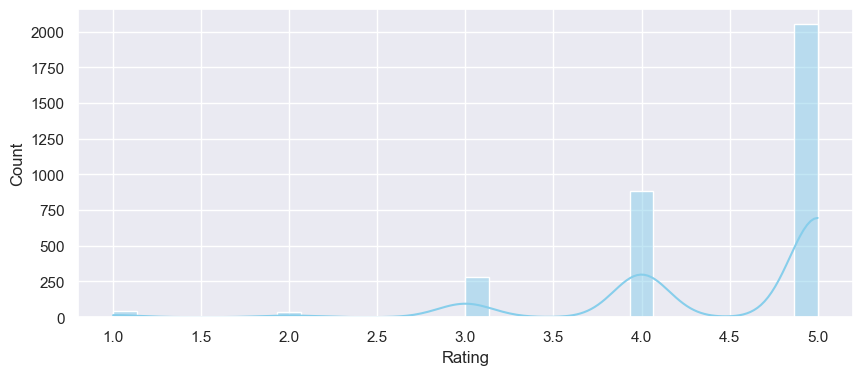

In [534]:
'''

    find histogram base on rating

'''
sns.set(style="darkgrid")
plot_count_hit_rating = sns.histplot(data=data, x="Rating", color="skyblue", label="Rating", kde=True)
plt.savefig('experimental_image/plot_count_hit_rating.png')

In [535]:
'''
    
    change user and store to idx2user or idx2item

'''

user2idx = {user: idx for idx, user in enumerate(data.User.unique())}
idx2user = {idx: user for user, idx in user2idx.items()}

item2idx = {item: idx for idx, item in enumerate(data.Store.unique())}
idx2item = {idx: item for item, idx in item2idx.items()}

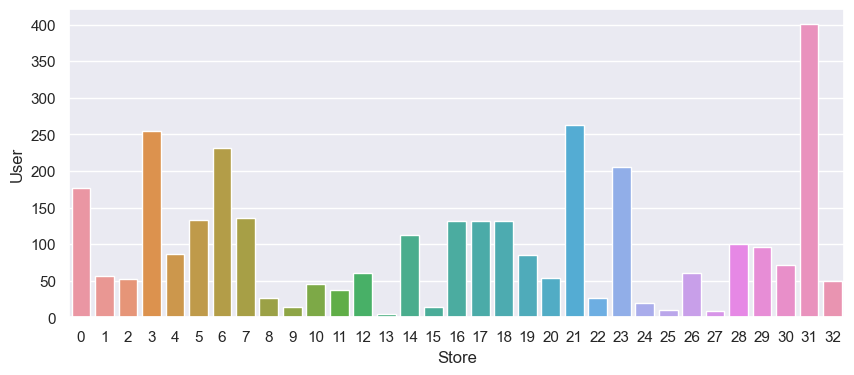

In [536]:
sns.set(rc={"figure.figsize":(10, 4)})
plot_count = sns.barplot(data=test.groupby(['Store']).count()['User'].reset_index(), x="Store",y='User',width=0.8)
plt.savefig("experimental_image/save_count.png")

# EXPERIMENTAL 

In [537]:
'''

    create experimental range score

'''
reader = Reader(rating_scale=(1, 5))

In [538]:
test = data.copy()
test['User'] = test['User'].map(user2idx)
test['Store'] = test['Store'].map(item2idx)

```

loader data set and split data to trainset and testset

```


In [539]:
dataset = Dataset.load_from_df(test[['User','Store','Rating']],reader)
trainset, testset = train_test_split(dataset, test_size=0.20)

```
algo knn,svd,nmf wiht suprise

https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#
```

In [543]:
sim_options = {
    "k": 10,

    "name": "cosine",
    "user_based": True,  # compute  similarities between items
}


knnbasic = KNNBasic(sim_options=sim_options,verbose=False)
svd = SVD(n_epochs=30,n_factors=10,lr_all=0.02)
nmf = NMF(n_epochs=30,n_factors=10)

setup = {
    'KNN_BASIC':knnbasic,
    'SVD':svd,
    'NMF':nmf
}

hist = []

def train_(algo):
    for name,model in setup.items():
        print(name,end='\n')
        model.fit(trainset)
        predictions = model.test(testset)
        hist.append({
            f'{name}':{
                "RMSE" :accuracy.rmse(predictions),
                "MAE" :accuracy.mae(predictions),
                "MSE" :accuracy.mse(predictions)
            }
        
        
        })
        
        
train_(algo)

KNN_BASIC
RMSE: 0.8728
MAE:  0.6857
MSE: 0.7617
SVD
RMSE: 0.8241
MAE:  0.5940
MSE: 0.6791
NMF
RMSE: 1.1311
MAE:  0.9203
MSE: 1.2795


In [544]:
df = pd.DataFrame.from_records([{**{'Algorithm': k}, **v} for d in hist for k, v in d.items()])
df

,Algorithm,RMSE,MAE,MSE
0,KNN_BASIC,0.872755,0.685695,0.761702
1,SVD,0.824054,0.594039,0.679066
2,NMF,1.131141,0.920260,1.279480


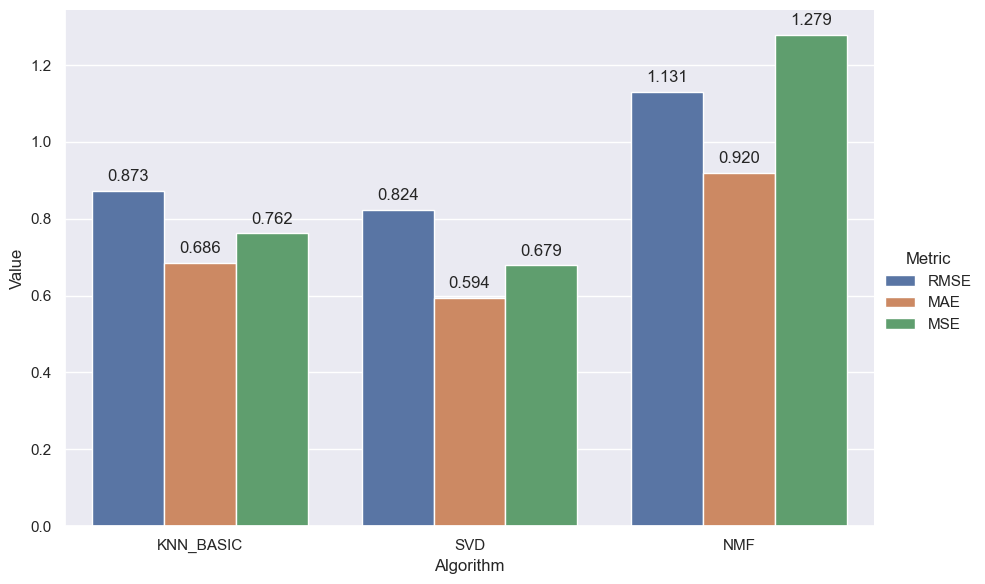

In [545]:
evaluations = sns.catplot(x='Algorithm', y='Value', hue='Metric', kind='bar', 
            data=df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value'), 
            height=6, aspect=1.5)


for ax in evaluations.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
        

plt.savefig('experimental_image/evalutaions.png')


In [546]:
df = pd.DataFrame.from_records([{**{'Algorithm': k}, **v} for d in hist for k, v in d.items()])
df

,Algorithm,RMSE,MAE,MSE
0,KNN_BASIC,0.872755,0.685695,0.761702
1,SVD,0.824054,0.594039,0.679066
2,NMF,1.131141,0.920260,1.279480


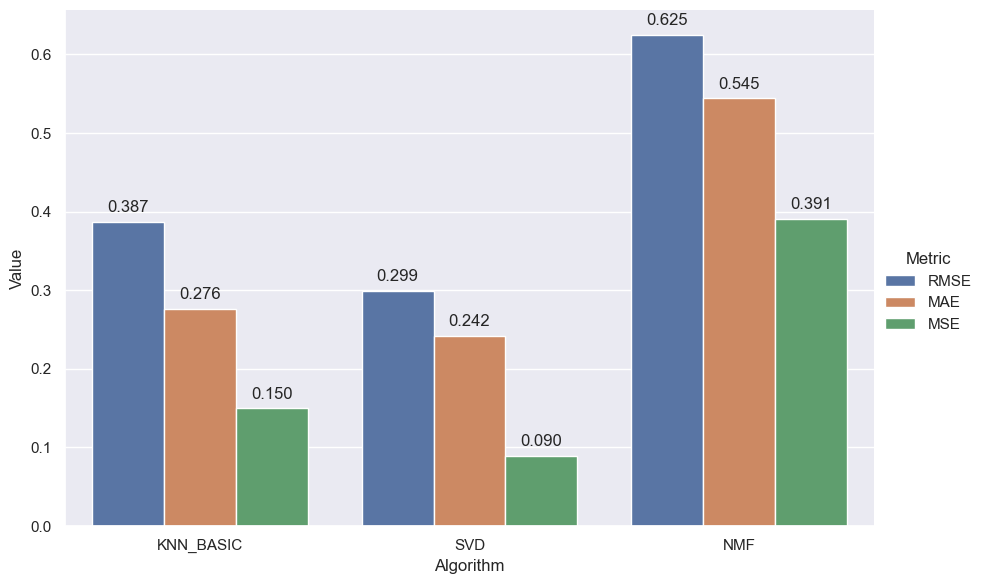

In [525]:
evaluations = sns.catplot(x='Algorithm', y='Value', hue='Metric', kind='bar', 
            data=df.melt(id_vars='Algorithm', var_name='Metric', value_name='Value'), 
            height=6, aspect=1.5)


for ax in evaluations.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
        

plt.savefig('experimental_image/evalutaions1.png')


In [465]:
model = SVD(n_epochs=30, n_factors=15, lr_all=0.02)
model.fit(trainset)

# Create a testset with all the user-item pairs in the dataset
testset = trainset.build_anti_testset()

# Generate predictions for all user-item pairs in the dataset
predictions = model.test(testset)


```

predict rating pivot

```

In [522]:
# Convert the predictions to a Pandas DataFrame
pred_df = pd.DataFrame(predictions, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating', 'details'])
pred_df = pred_df.drop(columns=['details'])  # Drop the 'details' column

# Manipulate the DataFrame as needed (e.g. filter by user, item, rating, etc.)
pred_df.head()
pd.pivot(pred_df,index='user_id',columns='item_id',values='predicted_rating').fillna(0)

item_id,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,4.085830,4.013229,3.908730,3.677051,4.014037,0.000000,3.518601,3.962437,4.068843,...,3.349331,4.112854,3.897472,3.824131,3.896488,4.156301,4.145748,3.901450,3.514637,4.096715
2,0.000000,5.000000,0.000000,4.824176,0.000000,4.713889,5.000000,4.931482,4.939656,5.000000,...,4.645228,5.000000,4.907004,5.000000,4.805201,4.835070,4.999291,4.890108,4.412002,5.000000
3,0.000000,0.000000,0.000000,3.860752,4.496448,4.372248,3.821212,4.040815,4.085549,4.237711,...,3.919312,0.000000,4.124177,0.000000,4.009856,3.686585,4.261596,3.942282,4.037793,4.335873
5,4.561266,4.345685,0.000000,4.247041,4.286887,4.224132,0.000000,4.348446,4.231768,4.366252,...,3.814338,4.336091,4.276225,4.140980,4.107323,4.088000,4.343866,4.120127,4.284698,4.358068
7,3.627369,0.000000,3.907235,3.942597,3.520993,3.639504,0.000000,3.448129,3.945996,4.020088,...,3.047194,0.000000,3.909398,3.637192,3.694662,0.000000,0.000000,0.000000,3.120251,3.883802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,4.401116,4.317403,4.175497,4.328312,4.345387,4.101287,4.363999,4.327954,4.254378,4.434246,...,3.865876,4.440846,4.367828,4.235167,4.202338,4.378269,4.294244,4.217363,4.240827,0.000000
2233,4.715322,4.819884,4.528554,4.579041,4.486882,4.506105,4.591504,4.630889,4.752773,4.857472,...,4.317467,4.873331,4.643074,4.702547,4.606950,4.496490,4.805461,4.644254,4.254163,0.000000
2234,4.603693,4.780741,4.671589,4.525188,4.692665,4.510259,4.792808,4.632217,4.786400,4.825659,...,4.144853,4.853087,4.691422,4.649453,4.643989,4.673694,4.766474,4.471643,4.152357,0.000000


```

acutal rating

```

In [478]:
aa = test[['User','Store','Rating']] 

In [487]:
pred_df['user_id'].unique()

array([1934,  380,  322, ...,  389,  170, 2128])

In [498]:
index2 = pred_df.user_id.unique()
index2

array([1934,  380,  322, ...,  389,  170, 2128])

In [547]:
aa.pivot(index='User',columns='Store',values='Rating')

Store,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
User,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,5.0,NaN,5.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [470]:
aa = test[['User','Store','Rating']] 
aa[aa['User'] == 7]

,User,Store,Rating
7,7,0,4
200,7,1,4
859,7,6,4
1203,7,10,3
1323,7,14,4
1837,7,18,3
1893,7,19,4
2505,7,24,4
2625,7,28,4
2751,7,29,5


In [446]:
pred_df = pd.DataFrame(predictions, columns=['user_id', 'item_id', 'actual_rating', 'predicted_rating', 'details'])
pred_df = pred_df.drop(columns=['details'])  # Drop the 'details' column

# Manipulate the DataFrame as needed (e.g. filter by user, item, rating, etc.)
pred_df


,user_id,item_id,actual_rating,predicted_rating
0,1586,23,5.0,4.471842
1,1106,17,4.0,3.290388
2,2061,31,5.0,4.471842
3,339,23,5.0,3.741525
4,1520,21,5.0,4.471842
...,...,...,...,...
652,31,0,5.0,4.846167
653,33,0,5.0,4.471842
654,1159,16,5.0,3.767578
655,219,1,4.0,2.855004


In [414]:
'KNN_BASIC 1.858 SVD 1.839 NMF 2.429'

'KNN_BASIC 1.858 SVD 1.839 NMF 2.429'

## kfold and cross_validate

In [405]:

kf = KFold(n_splits=5)

algo = KNNBasic(n_epochs=15,n_factors=20)

for trainset, testset in kf.split(dataset):

    algo.fit(trainset)
    predictions = algo.test(testset)

    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7412
MAE:  0.5874
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7814
MAE:  0.5932
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7785
MAE:  0.6015
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7077
MAE:  0.5680
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8116
MAE:  0.6276


In [406]:
cross_validate(algo, dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7692  0.7525  0.7729  0.7473  0.7821  0.7648  0.0130  
MAE (testset)     0.6040  0.5821  0.5942  0.5769  0.6073  0.5929  0.0119  
Fit time          0.02    0.02    0.01    0.01    0.02    0.02    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.7691749 , 0.7524657 , 0.77289847, 0.7473327 , 0.78213092]),
 'test_mae': array([0.6039838 , 0.58208995, 0.59422358, 0.57690911, 0.60725956]),
 'fit_time': (0.018815994262695312,
  0.015785932540893555,
  0.014384031295776367,
  0.01396799087524414,
  0.015086889266967773),
 'test_time': (0.014441967010498047,
  0.013126850128173828,
  0.012857675552368164,
  0.012783050537109375,
  0.012784242630004883)}

In [407]:

kf = KFold(n_splits=5)

algo = SVD(n_epochs=15,n_factors=20)

for trainset, testset in kf.split(dataset):

    algo.fit(trainset)
    predictions = algo.test(testset)

    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)

RMSE: 0.7584
MAE:  0.5925
RMSE: 0.8006
MAE:  0.6109
RMSE: 0.7692
MAE:  0.6067
RMSE: 0.7247
MAE:  0.5877
RMSE: 0.7337
MAE:  0.5799


In [408]:
cross_validate(algo, dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7630  0.7505  0.7757  0.7200  0.7846  0.7587  0.0225  
MAE (testset)     0.5989  0.5863  0.6016  0.5848  0.6110  0.5965  0.0098  
Fit time          0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.76302949, 0.75046462, 0.77567043, 0.72001091, 0.78457219]),
 'test_mae': array([0.59894529, 0.58632191, 0.6015579 , 0.58482217, 0.61104713]),
 'fit_time': (0.01611328125,
  0.006929874420166016,
  0.005654811859130859,
  0.005730152130126953,
  0.005106210708618164),
 'test_time': (0.0020232200622558594,
  0.0018689632415771484,
  0.0017139911651611328,
  0.0017409324645996094,
  0.0016248226165771484)}

```

model NMF

```

In [409]:
kf = KFold(n_splits=5)

algo = NMF(n_epochs=15,n_factors=20)

for trainset, testset in kf.split(dataset):

    algo.fit(trainset)
    predictions = algo.test(testset)

    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)

RMSE: 0.8644
MAE:  0.7129
RMSE: 0.8438
MAE:  0.6997
RMSE: 0.8849
MAE:  0.7287
RMSE: 0.9882
MAE:  0.7841
RMSE: 0.8758
MAE:  0.7244


In [410]:
cross_validate(algo, dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9332  0.9122  0.8882  0.8866  0.8642  0.8969  0.0237  
MAE (testset)     0.7671  0.7450  0.6988  0.7438  0.7196  0.7349  0.0235  
Fit time          0.05    0.03    0.03    0.03    0.03    0.03    0.01    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.93316902, 0.9122484 , 0.88817373, 0.88657443, 0.86415347]),
 'test_mae': array([0.76708484, 0.7449542 , 0.69880775, 0.74380891, 0.71962204]),
 'fit_time': (0.050724029541015625,
  0.030019044876098633,
  0.025758028030395508,
  0.02643609046936035,
  0.025714874267578125),
 'test_time': (0.0025420188903808594,
  0.0014619827270507812,
  0.0015139579772949219,
  0.0016829967498779297,
  0.0015151500701904297)}

## TRY MORE

In [297]:
trainset = dataset.build_full_trainset()
testset = trainset.build_testset()

In [300]:
trainset.n_users

2237

In [304]:
algo = SVD(n_epochs=15,n_factors=20)

algo.fit(trainset)


In [344]:
predictions = algo.predict(0,33).est

In [345]:
pre

NameError: name 'pre' is not defined

In [254]:
x = algo.predict(17, 1203, r_ui=4, verbose=True)

user: 17         item: 1203       r_ui = 4.00   est = 4.50   {'was_impossible': False}


```

grid serach cv for find paremeter best model

```

In [180]:
np.arange(1,20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [185]:
param_grid = {
    'k': np.arange(1,20),
    'sim_options': {
        'name': ['cosine'],
        'min_support': [1, 5],
        'user_based': [False],
    },
}

In [188]:
# gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse", "mae"], cv=3)
# gs.fit(trainset)
# print(gs.best_score["rmse"])
# print(gs.best_params["rmse"])


In [154]:


""" 

n_epochs is number of train
lr_all is learning rate
reg_all is regularization term for all parameters


"""



' \n\nn_epochs is number of train\nlr_all is learning rate\nreg_all is regularization term for all parameters\n\n\n'

In [155]:
param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005, 0.001, 0.01], "reg_all": [0.4, 0.6, 0.7 ,0.2],"n_factors":[5,10,15,20,30]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=5)

In [121]:
gs.fit(dataset)
# best RMSE score

print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

0.7510739792757256
{'n_epochs': 10, 'lr_all': 0.01, 'reg_all': 0.2, 'n_factors': 5}


In [122]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all,param_n_factors
0,0.771657,0.783685,0.732995,0.841491,0.732773,0.772520,0.040061,116,0.629705,0.623394,...,120,0.002051,0.000591,0.002262,0.000346,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",5,0.002,0.4,5
1,0.771949,0.783330,0.732887,0.841079,0.731752,0.772199,0.040124,113,0.630108,0.622918,...,116,0.001474,0.000099,0.001727,0.000208,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",5,0.002,0.4,10
2,0.771623,0.784563,0.733235,0.840870,0.732986,0.772655,0.039809,120,0.628784,0.623415,...,117,0.001589,0.000063,0.001519,0.000073,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",5,0.002,0.4,15
3,0.770473,0.784390,0.733063,0.841560,0.730773,0.772052,0.040522,107,0.628525,0.623558,...,112,0.001553,0.000089,0.001306,0.000078,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",5,0.002,0.4,20
4,0.771778,0.784096,0.731556,0.838529,0.732144,0.771621,0.039487,102,0.630172,0.624010,...,110,0.001942,0.000032,0.001204,0.000010,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0....",5,0.002,0.4,30


In [45]:
model.fit(trainset)

In [46]:
prediction = model.test(testset)

In [47]:
accuracy.rmse(prediction)

RMSE: 0.7398


0.739845653123489